In [68]:
import torch
import os

In [69]:
import numpy as np

In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
sorted(os.listdir('/Users/yashsurange/Documents/GitHub/FER-from-static-images/CK+_Complete'))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [72]:
os.listdir('/Users/yashsurange/Documents/GitHub/FER-from-static-images/')

['shape_predictor_68_face_landmarks.dat',
 '.DS_Store',
 'check.ipynb',
 'CK+_Complete',
 '__pycache__',
 'model.py',
 'README.md',
 'dataset.py',
 '.gitignore',
 'preprocessing.py',
 '.git']

In [73]:
from dataset import ckplus

In [74]:
test_data=ckplus('./CK+_Complete/')

In [75]:
test_data.__getitem__(0)[0].shape

torch.Size([300, 300, 3])

In [76]:
np.array(test_data.__getitem__(0)[0]).reshape(480,720,1).shape

ValueError: cannot reshape array of size 270000 into shape (480,720,1)

345600

In [ ]:
test_data.__len__()

1635

In [ ]:
# width=720 and height=480
(test_data.__getitem__(0)[0]).size

(720, 480)

In [ ]:
image=np.array((test_data.__getitem__(0)[0]))

In [ ]:
image.shape

(480, 720)

In [ ]:
np.all(np.stack((image,)*3,axis=-1)[:,:,2]==image)

True

In [ ]:
np.stack((image,)*3,axis=0).shape

(3, 480, 720)

In [ ]:
np.stack((image,)*3,axis=-1)[:,:,2].shape

(480, 720)

In [ ]:
np.stack((image,)*3,axis=-1)[1].shape

(720, 3)

In [ ]:
image

array([[ 72, 253, 254, ...,   2,   1,   0],
       [ 73, 253, 254, ...,   2,   1,   0],
       [ 73, 253, 254, ...,   2,   1,   0],
       ...,
       [ 72, 253, 254, ...,   1,   1,   1],
       [ 72, 253, 254, ...,   1,   1,   1],
       [ 72, 253, 254, ...,   1,   1,   1]], dtype=uint8)

In [ ]:
test_image=np.array([[1,2,3],
                    [3,4,5]])
test_image.shape

(2, 3)

In [ ]:
np.stack((test_image,)*2,axis=-1)

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[3, 3],
        [4, 4],
        [5, 5]]])

In [ ]:
torch.tensor(test_data.__getitem__(0)[0]).shape

torch.Size([480, 720, 3])

In [ ]:
from torchvision import transforms
from PIL import Image
resize_transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL image
    transforms.Resize((300, 300), interpolation=Image.BILINEAR),  # Resize to 300x300
    transforms.ToTensor()  # Convert back to tensor
])

In [ ]:
torch.tensor(test_data.__getitem__(0)[0])

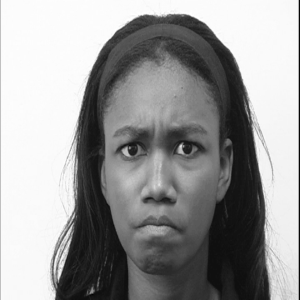

In [ ]:
resize_transform(np.array(test_data.__getitem__(0)[0]))

In [ ]:
check2=ckplus('./CK+_Complete/')

In [ ]:
check2[0]

(tensor([[[192, 192, 192],
          [251, 251, 251],
          [250, 250, 250],
          ...,
          [247, 247, 247],
          [181, 181, 181],
          [  6,   6,   6]],
 
         [[192, 192, 192],
          [251, 251, 251],
          [251, 251, 251],
          ...,
          [247, 247, 247],
          [181, 181, 181],
          [  6,   6,   6]],
 
         [[192, 192, 192],
          [251, 251, 251],
          [251, 251, 251],
          ...,
          [248, 248, 248],
          [181, 181, 181],
          [  6,   6,   6]],
 
         ...,
 
         [[192, 192, 192],
          [250, 250, 250],
          [249, 249, 249],
          ...,
          [220, 220, 220],
          [166, 166, 166],
          [  6,   6,   6]],
 
         [[192, 192, 192],
          [250, 250, 250],
          [249, 249, 249],
          ...,
          [220, 220, 220],
          [166, 166, 166],
          [  6,   6,   6]],
 
         [[192, 192, 192],
          [250, 250, 250],
          [249, 249, 249],
   

In [ ]:
transforms.ToTensor()((transforms.Resize((300, 300), interpolation=Image.BILINEAR)(transforms.ToPILImage()(check2.__getitem__(0)[0])))).shape

torch.Size([3, 300, 300])

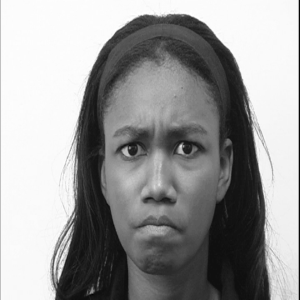

In [ ]:
transforms.ToPILImage()(np.array(check2.__getitem__(0)[0]))

In [ ]:
check2.__getitem__(0)[0]

tensor([[[192, 192, 192],
         [251, 251, 251],
         [250, 250, 250],
         ...,
         [247, 247, 247],
         [181, 181, 181],
         [  6,   6,   6]],

        [[192, 192, 192],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [247, 247, 247],
         [181, 181, 181],
         [  6,   6,   6]],

        [[192, 192, 192],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [248, 248, 248],
         [181, 181, 181],
         [  6,   6,   6]],

        ...,

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [220, 220, 220],
         [166, 166, 166],
         [  6,   6,   6]],

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [220, 220, 220],
         [166, 166, 166],
         [  6,   6,   6]],

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [223, 223, 223],
        

In [ ]:
resize_transform(check2.__getitem__(0)[0])[2]

tensor([[0.7529, 0.9843, 0.9804,  ..., 0.9686, 0.7098, 0.0235],
        [0.7529, 0.9843, 0.9843,  ..., 0.9686, 0.7098, 0.0235],
        [0.7529, 0.9843, 0.9843,  ..., 0.9725, 0.7098, 0.0235],
        ...,
        [0.7529, 0.9804, 0.9765,  ..., 0.8627, 0.6510, 0.0235],
        [0.7529, 0.9804, 0.9765,  ..., 0.8627, 0.6510, 0.0235],
        [0.7529, 0.9804, 0.9765,  ..., 0.8745, 0.6588, 0.0235]])

In [ ]:
torch.tensor(np.array(check2.__getitem__(0)[0])).shape#.permute(1,2,0).shape

torch.Size([300, 300, 3])

In [ ]:
image_test=np.array(check2.__getitem__(0)[0])

In [ ]:
check2.__getitem__(0)[0]

tensor([[[192, 192, 192],
         [251, 251, 251],
         [250, 250, 250],
         ...,
         [247, 247, 247],
         [181, 181, 181],
         [  6,   6,   6]],

        [[192, 192, 192],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [247, 247, 247],
         [181, 181, 181],
         [  6,   6,   6]],

        [[192, 192, 192],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [248, 248, 248],
         [181, 181, 181],
         [  6,   6,   6]],

        ...,

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [220, 220, 220],
         [166, 166, 166],
         [  6,   6,   6]],

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [220, 220, 220],
         [166, 166, 166],
         [  6,   6,   6]],

        [[192, 192, 192],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [223, 223, 223],
        

In [ ]:
image_test.dtype

dtype('uint8')

In [ ]:
image_test.shape

(300, 300, 3)

In [ ]:
import cv2

In [ ]:
clahe = cv2.createCLAHE(clipLimit=1)
final_img = clahe.apply(image_test[:,:,0])+20

In [ ]:
type(final_img)

numpy.ndarray

In [ ]:
test_tensor=check2.__getitem__(0)[0]

In [ ]:
from preprocessing import preprocessing_image
test_pre=preprocessing_image()
type(test_pre.clahe(test_tensor))


numpy.ndarray

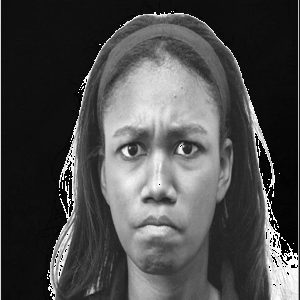

In [ ]:
transforms.ToPILImage()(final_img)

In [ ]:
type(final_img)

numpy.ndarray

In [ ]:
np.all(image_test[:,:,0]==image_test[:,:,2])

True

In [ ]:
from torchvision.models.detection import ssd

model = ssd.ssd300_vgg16(pretrained=True)

/Users/yashsurange/miniforge3/envs/FER/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yashsurange/miniforge3/envs/FER/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
test_tensor=transforms.ToTensor()(image_test)

In [ ]:
test_tensor.shape

torch.Size([3, 300, 300])

In [ ]:
with torch.no_grad():
    
  detections=model([test_tensor])

In [ ]:
detections[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
detections[0]['boxes']

tensor([[ 34.8537,  13.0647, 294.2927, 298.2159],
        [ 36.9165,  29.3753, 160.6267, 285.6434],
        [211.1705, 106.0665, 274.1754, 297.3253],
        [ 46.5083,  55.2421, 114.4245, 264.3495],
        [  0.0000,  33.9700, 115.6209, 193.0044],
        [ 39.4439,   0.0000, 277.6667, 152.8955],
        [234.4690,  39.1733, 300.0000, 282.8914],
        [129.7254, 249.2117, 211.8894, 300.0000],
        [ 17.8140,  56.8222,  80.2129, 260.7889],
        [133.8101, 252.1098, 170.4325, 300.0000],
        [164.1061,  11.9823, 289.8631, 241.9946],
        [130.0543, 117.4151, 294.6531, 297.4512],
        [119.2709, 250.9349, 152.0921, 300.0000],
        [166.4279, 248.4505, 203.6777, 299.5230],
        [ 32.0058,  22.5551, 135.5397, 142.4468],
        [215.3416, 219.2445, 276.0424, 298.7765],
        [258.1440, 234.7361, 296.4292, 296.4520],
        [152.8134, 244.6036, 182.4313, 300.0000],
        [187.0421, 225.1457, 218.5990, 295.5959],
        [102.5391, 248.9196, 133.6647, 300.0000],


In [ ]:
detections[0]['scores']

tensor([0.9945, 0.0366, 0.0346, 0.0336, 0.0289, 0.0270, 0.0259, 0.0254, 0.0244,
        0.0244, 0.0236, 0.0233, 0.0223, 0.0219, 0.0212, 0.0208, 0.0207, 0.0202,
        0.0199, 0.0196, 0.0194, 0.0183, 0.0180, 0.0178, 0.0178, 0.0173, 0.0172,
        0.0170, 0.0168, 0.0167, 0.0166, 0.0159, 0.0159, 0.0157, 0.0154, 0.0152,
        0.0149, 0.0146, 0.0146, 0.0144, 0.0143, 0.0142, 0.0142, 0.0140, 0.0140,
        0.0140, 0.0139, 0.0139, 0.0138, 0.0137, 0.0137, 0.0136, 0.0136, 0.0135,
        0.0134, 0.0133, 0.0133, 0.0132, 0.0132, 0.0131, 0.0131, 0.0131, 0.0130,
        0.0130, 0.0130, 0.0129, 0.0129, 0.0129, 0.0127, 0.0127, 0.0127, 0.0127,
        0.0126, 0.0126, 0.0125, 0.0125, 0.0125, 0.0123, 0.0121, 0.0121, 0.0121,
        0.0120, 0.0120, 0.0118, 0.0118, 0.0117, 0.0117, 0.0116, 0.0116, 0.0115,
        0.0115, 0.0115, 0.0115, 0.0115, 0.0114, 0.0114, 0.0113, 0.0113, 0.0112,
        0.0112, 0.0112, 0.0111, 0.0111, 0.0111, 0.0110, 0.0110, 0.0109, 0.0109,
        0.0109, 0.0109, 0.0109, 0.0109, 

In [ ]:
detections[0]['labels']

tensor([ 1,  1,  1,  1,  1,  1,  1, 32,  1, 32,  1,  1, 32, 32,  1,  1, 62, 32,
        32, 32, 62,  1,  1, 62,  1, 62,  1,  1, 32,  1,  1,  1,  1,  1,  1,  1,
        62,  1,  1,  1,  1,  1,  1, 32,  1,  1,  1,  1,  1, 62,  1,  1,  1,  1,
         1,  1,  1, 62,  1, 62,  1, 32, 62,  1,  1,  1,  1, 62, 62, 32,  1,  1,
         1,  1, 62,  1,  1, 62, 32, 62,  1,  1,  1,  1, 62,  1, 62, 62,  1,  1,
         1,  1, 77, 32,  1, 62,  1, 62,  1,  1,  1,  1, 32, 62,  1,  1,  1,  1,
         1, 62,  1,  1, 62,  1, 62, 32, 62, 62, 32, 62, 62, 62, 77, 32, 62, 62,
        62, 32])

In [ ]:
detections[0]['labels'][0]

tensor(1)

In [ ]:
# Filter detections based on confidence threshold
# confidence_threshold = 0.5
# filtered_detections = [detection for detection in detections[0] if detection[0].item() > confidence_threshold]

# # Extract ROIs and display/save them
# for detection in filtered_detections:
#     label, score, box = detection
x, y, x_max, y_max = detections[0]['boxes'][0].tolist()
roi = transforms.ToPILImage()(image_test).crop((x, y, x_max, y_max))
#roi.show()  # Display the extracted ROI







In [ ]:
torch.tensor(roi)

RuntimeError: Could not infer dtype of Image

In [ ]:
x,y

(34.85368347167969, 13.064727783203125)

In [ ]:
np.array(roi).shape

(285, 259, 3)

In [ ]:
np.all(np.array(roi)[:,:,0]==np.array(roi)[:,:,1])

True

In [ ]:
type(roi)

PIL.Image.Image

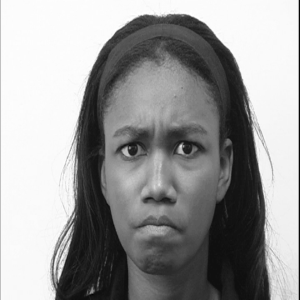

In [ ]:
transforms.ToPILImage()(image_test)

In [ ]:
pred

[{'boxes': tensor([[ 34.8537,  13.0647, 294.2927, 298.2159],
          [ 36.9165,  29.3753, 160.6267, 285.6434],
          [211.1705, 106.0665, 274.1754, 297.3253],
          [ 46.5083,  55.2421, 114.4245, 264.3495],
          [  0.0000,  33.9700, 115.6209, 193.0044],
          [ 39.4439,   0.0000, 277.6667, 152.8955],
          [234.4690,  39.1733, 300.0000, 282.8914],
          [129.7254, 249.2117, 211.8894, 300.0000],
          [ 17.8140,  56.8222,  80.2129, 260.7889],
          [133.8101, 252.1098, 170.4325, 300.0000],
          [164.1061,  11.9823, 289.8631, 241.9946],
          [130.0543, 117.4151, 294.6531, 297.4512],
          [119.2709, 250.9349, 152.0921, 300.0000],
          [166.4279, 248.4505, 203.6777, 299.5230],
          [ 32.0058,  22.5551, 135.5397, 142.4468],
          [215.3416, 219.2445, 276.0424, 298.7765],
          [258.1440, 234.7361, 296.4292, 296.4520],
          [152.8134, 244.6036, 182.4313, 300.0000],
          [187.0421, 225.1457, 218.5990, 295.5959],
   

In [ ]:
torch.tensor(image_test).permute(2,0,1).shape

torch.Size([3, 300, 300])

In [ ]:
list_labels=["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
list_labels[32]

'suitcase'

In [ ]:
import dlib
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [ ]:
rec=detector(face,0)

In [ ]:
type(face)

numpy.ndarray

In [ ]:
temp=dlib.rectangle(rec[0].left(),rec[0].top(),rec[0].right(),rec[0].bottom())

In [ ]:
predictor(face,temp).parts()

points[(73, 150), (74, 167), (76, 185), (81, 202), (85, 218), (91, 233), (99, 247), (110, 257), (126, 260), (143, 259), (158, 253), (169, 240), (178, 224), (183, 207), (188, 187), (191, 168), (191, 148), (83, 130), (89, 121), (99, 118), (110, 120), (121, 123), (136, 123), (147, 119), (159, 117), (170, 119), (178, 128), (128, 142), (128, 155), (127, 167), (127, 180), (116, 193), (122, 194), (128, 195), (134, 194), (141, 193), (91, 144), (97, 137), (107, 136), (115, 146), (107, 148), (97, 149), (145, 145), (153, 135), (163, 134), (170, 141), (163, 146), (153, 147), (107, 220), (114, 212), (122, 207), (128, 209), (133, 207), (142, 213), (150, 222), (141, 227), (133, 229), (127, 229), (120, 229), (113, 226), (111, 219), (122, 217), (128, 218), (133, 218), (146, 221), (133, 217), (127, 217), (121, 216)]

In [ ]:
type(temp)

_dlib_pybind11.rectangle

In [ ]:
rectangle=dlib.rectange

In [ ]:
type(rec)

_dlib_pybind11.rectangles

In [ ]:
for r in enumerate(rec):
    print(r)

(0, rectangle(62,95,211,244))


In [ ]:
type(rec)

_dlib_pybind11.rectangles

In [ ]:

shape=predictor(face,rec)

TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.shape_predictor, image: numpy.ndarray, box: _dlib_pybind11.rectangle) -> _dlib_pybind11.full_object_detection

Invoked with: <_dlib_pybind11.shape_predictor object at 0x28a0ac670>, array([[[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 12,  12,  12]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [ 12,  12,  12],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       ...,

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [216, 216, 216],
        [213, 213, 213],
        [215, 215, 215]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [211, 211, 211],
        [206, 206, 206],
        [210, 210, 210]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [196, 196, 196],
        [189, 189, 189],
        [200, 200, 200]]], dtype=uint8), rectangles[[(62, 95) (211, 244)]]

In [ ]:
from dataset import ckplus
landmark=ckplus('./CK+_Complete/')

In [ ]:
test_image=landmark.__getitem__(0)[0]

In [ ]:
type(test_image)

torch.Tensor

In [ ]:
from preprocessing import preprocessing_image
test_preprocessing=preprocessing_image()
clahe_image=test_preprocessing.clahe(test_image)
face=test_preprocessing.face_detection(clahe_image)

In [ ]:
face.shape

torch.Size([292, 258, 3])

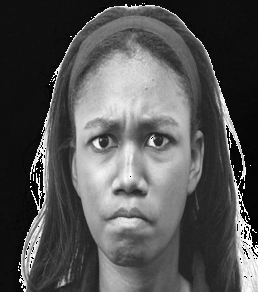

In [ ]:
transforms.ToPILImage()(np.array(face))

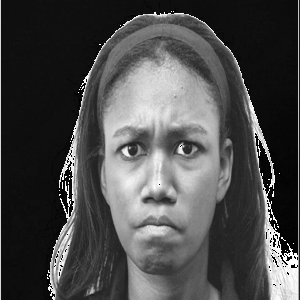

In [ ]:
transforms.ToPILImage()(clahe_image)

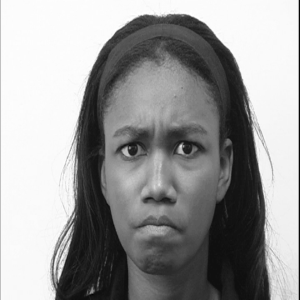

In [ ]:
from torchvision import transforms
transforms.ToPILImage()(np.array(landmark.__getitem__(0)[0]))

***
Rough work: making model architecture



In [134]:
import torch
import torch.nn as nn
from model import feature_extractor

In [135]:
test_image=torch.randn(160,160,3)

In [136]:
test_image=test_image.permute(2,0,1)

In [137]:
test_image.shape

torch.Size([3, 160, 160])

In [138]:
testing_object=feature_extractor(3,128)
# conv1=testing_object.convolutional_block(3,16)

In [141]:
ll_testing=testing_object(test_image.view(1,3,160,160))

In [104]:
testing_object.block_sequence(test_image.view(1,3,160,160)).shape

torch.Size([1, 128, 10, 10])

In [10]:
nn.AvgPool2d(kernel_size=10)(testing_object.block_sequence(test_image.view(1,3,160,160))).reshape(1,-1).shape

torch.Size([1, 128])

In [64]:
len(testing_object.block_sequence)


8

In [83]:
for layer in testing_object.block_sequence[0]:
    if isinstance(layer,nn.Conv2d):
        print(layer.bias)

Parameter containing:
tensor([ 0.0281, -0.0080, -0.0559, -0.0252, -0.0477,  0.0925,  0.0482,  0.0533,
         0.1193, -0.0101, -0.0519, -0.1430, -0.1217, -0.1043,  0.1138, -0.1586],
       requires_grad=True)
Parameter containing:
tensor([ 0.0297,  0.0033,  0.0151,  0.0342, -0.0443, -0.0363, -0.0085, -0.0756,
         0.0330,  0.0164,  0.0329, -0.0174,  0.0112, -0.0341, -0.0636, -0.0807],
       requires_grad=True)


In [82]:
len(testing_object.block_sequence)

8

In [84]:
for i in range(len(testing_object.block_sequence)):
    if i%2==0:
        for layer in testing_object.block_sequence[i]:
            if isinstance(layer,nn.Conv2d):
                nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.constant_(layer.bias, 0)

In [75]:
for layer in testing_object.block_sequence[0].named_modules():
    print(layer)

('', Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
))
('0', Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same))
('1', BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
('2', ReLU())
('3', Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same))
('4', BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
('5', ReLU())


In [67]:
for i in [0,2,4,6]:
    print(testing_object.block_sequence[i])

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
)
Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
)
Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): BatchNorm2d(64, eps=1e-

In [194]:
nn.MaxPool2d(2,2)(conv1(test_image.view(1,3,160,160))).shape

torch.Size([1, 16, 80, 80])

In [160]:
test_object(test_image)

In [161]:
type(conv1)

torch.nn.modules.container.Sequential

In [147]:
conv1[0](test_image).shape

torch.Size([32, 160, 160])

In [149]:
conv1[2](conv1[0](test_image)).shape

torch.Size([16, 160, 160])

In [121]:
range(5)

range(0, 5)

In [152]:
from model import landmark_localization

In [153]:
ll_head=landmark_localization(68)

In [132]:
ll_head.dense_layers

Sequential(
  (0): Linear(in_features=128, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=68, bias=True)
)

In [133]:
for layers in ll_head.dense_layers:
    print(layers)

Linear(in_features=128, out_features=128, bias=True)
Linear(in_features=128, out_features=68, bias=True)


In [142]:
ll_testing

torch.Size([1, 128])

In [156]:
ll_head(ll_testing).shape

torch.Size([1, 68])

In [187]:
from model import expression_classification

testing_expression_classification=expression_classification(7)

In [188]:
testing_expression_classification.layers

Sequential(
  (0): Linear(in_features=128, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=7, bias=True)
  (3): Softmax(dim=1)
)

In [189]:
testing_object=torch.randn(1,128)

In [161]:
testing_object.shape

torch.Size([1, 128])

In [191]:
torch.sum(testing_expression_classification(testing_object))

tensor(1.0000, grad_fn=<SumBackward0>)

In [168]:
nn.Softmax(dim=1)(testing_expression_classification(testing_object))

tensor([[0.4676, 0.0358, 0.0089, 0.1016, 0.1337, 0.1654, 0.0869]],
       grad_fn=<SoftmaxBackward0>)

In [171]:
testing_expression_classification(testing_object).

2

In [183]:
nn.Softmax(dim=0)(torch.tensor([[1.0,2.0]]))

tensor([[1., 1.]])